In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import ants
import shutil

In [2]:
# os.mkdir('./test')

In [3]:
sub_list = os.listdir('/anvar/public_datasets/preproc_study/gbm/3a_atlas/')
sub = sub_list[5]

In [4]:
shutil.copyfile('/anvar/public_datasets/preproc_study/gbm/orig/'+ sub +'/CT1_SEG.nii.gz',
               './test/CT1_SEG.nii.gz')

'./test/CT1_SEG.nii.gz'

1. Rigid transform

In [5]:
os.listdir('/home/kate/projects/brain-mri-processing-pipeline/')

['.ipynb_checkpoints',
 'nnUNet',
 '.gitignore',
 'figures',
 'preprocessing',
 '.git',
 'datasets',
 'README.md']

In [9]:
atlas = ants.image_read('./test/sri24_T1.nii')

In [43]:
img = ants.image_read('./test/CT1.nii.gz')
mask = ants.image_read('./test/CT1_SEG.nii.gz')

img_to_sri = ants.registration(fixed=atlas, moving=img, type_of_transform='Rigid')

In [45]:
# Forward transformation image
img_fixed_res = ants.apply_transforms(atlas, img, whichtoinvert=[False], transformlist = img_to_sri['fwdtransforms'][0])

# Forward transformation mask
mask_fixed_res = ants.apply_transforms(atlas, mask, whichtoinvert=[False], transformlist = img_to_sri['fwdtransforms'][0])

In [35]:
img_to_sri

{'warpedmovout': ANTsImage (LPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (240, 240, 155)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (120.0, 129.0, -68.0)
 	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'warpedfixout': ANTsImage (RPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (256, 256, 79)
 	 Spacing    : (0.9375, 0.9375, 2.5)
 	 Origin     : (-118.2, 118.0625, -117.1)
 	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'fwdtransforms': ['/tmp/tmpjl1tvr_s0GenericAffine.mat'],
 'invtransforms': ['/tmp/tmpjl1tvr_s0GenericAffine.mat']}

In [34]:
io.loadmat('/tmp/tmpjl1tvr_s0GenericAffine.mat')

{'AffineTransform_float_3_3': array([[ 9.9751264e-01],
        [-6.8313196e-02],
        [-1.7371289e-02],
        [ 6.9077909e-02],
        [ 8.9838117e-01],
        [ 4.3375045e-01],
        [-1.4024838e-02],
        [-4.3387157e-01],
        [ 9.0086555e-01],
        [ 3.7027471e+00],
        [-6.3051105e+00],
        [-2.1574194e+01]], dtype=float32),
 'fixed': array([[-0.36250064],
        [13.358671  ],
        [ 0.14163458]], dtype=float32)}

In [ ]:
scipy.linalg.inv() 

In [13]:
shutil.copy(img_to_sri['fwdtransforms'][0], './test/T1C_to_SRI_fwd.mat')
shutil.copy(img_to_sri['invtransforms'][0], './test/T1C_to_SRI_inv.mat')

'./test/T1C_to_SRI_inv.mat'

In [17]:
from scipy import io

fwd = io.loadmat('./test/T1C_to_SRI_fwd.mat')
inv = io.loadmat('./test/T1C_to_SRI_inv.mat')

In [20]:
fwd['AffineTransform_float_3_3'].reshape(3,4)

array([[ 9.9751264e-01, -6.8313196e-02, -1.7371289e-02,  6.9077909e-02],
       [ 8.9838117e-01,  4.3375045e-01, -1.4024838e-02, -4.3387157e-01],
       [ 9.0086555e-01,  3.7027471e+00, -6.3051105e+00, -2.1574194e+01]],
      dtype=float32)

In [21]:
inv['AffineTransform_float_3_3'].reshape(3,4)

array([[ 9.9751264e-01, -6.8313196e-02, -1.7371289e-02,  6.9077909e-02],
       [ 8.9838117e-01,  4.3375045e-01, -1.4024838e-02, -4.3387157e-01],
       [ 9.0086555e-01,  3.7027471e+00, -6.3051105e+00, -2.1574194e+01]],
      dtype=float32)

In [32]:
np.allclose(fwd['AffineTransform_float_3_3'], inv['AffineTransform_float_3_3'])

True

In [23]:
inv['fixed']

array([[-0.36250064],
       [13.358671  ],
       [ 0.14163458]], dtype=float32)

In [24]:
fwd['fixed']

array([[-0.36250064],
       [13.358671  ],
       [ 0.14163458]], dtype=float32)

In [29]:
img

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 79)
	 Spacing    : (0.9375, 0.9375, 2.5)
	 Origin     : (-118.2, 118.0625, -117.1)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [42]:
img_fixed_res

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, 129.0, -68.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [30]:
atlas

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, 129.0, -68.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [46]:
mask_fixed_res

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, 129.0, -68.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

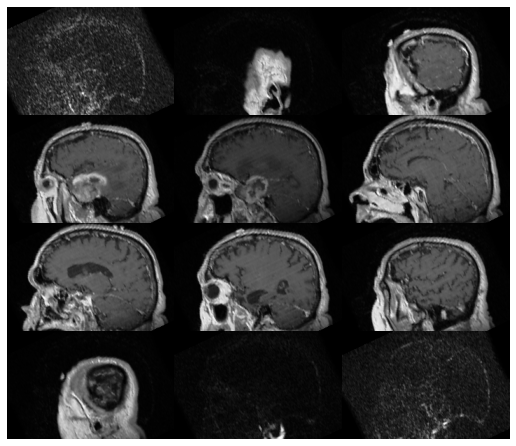

In [49]:
ants.plot(img_fixed_res)

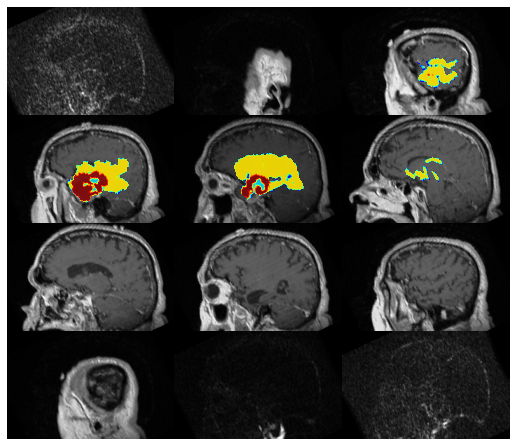

In [47]:
ants.plot(img_fixed_res, mask_fixed_res)

## 2. Inverse

In [50]:
# Forward transformation image
img_fixed_fwd_inv = ants.apply_transforms(img, img_fixed_res, whichtoinvert=[True], transformlist = img_to_sri['fwdtransforms'][0])

# Forward transformation mask
mask_fixed_fwd_inv  = ants.apply_transforms(img, mask_fixed_res, whichtoinvert=[True], transformlist = img_to_sri['fwdtransforms'][0])

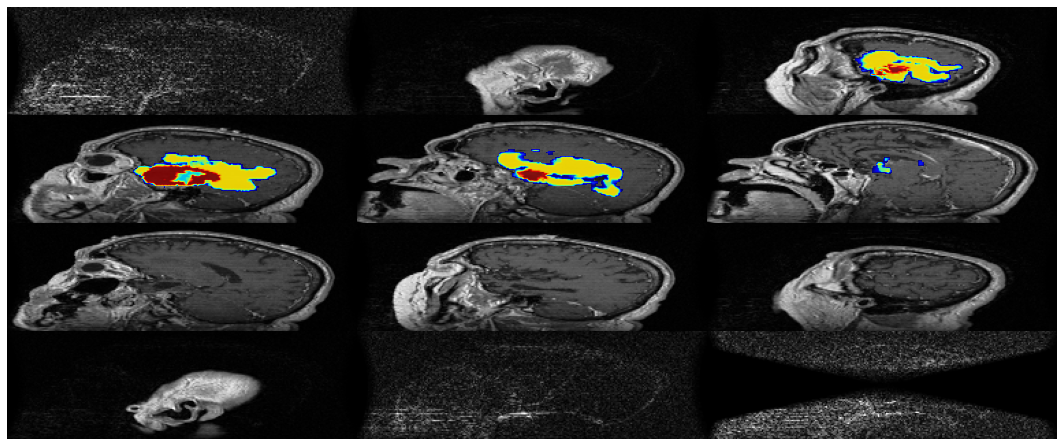

In [54]:
ants.plot(img, mask_fixed_fwd_inv)

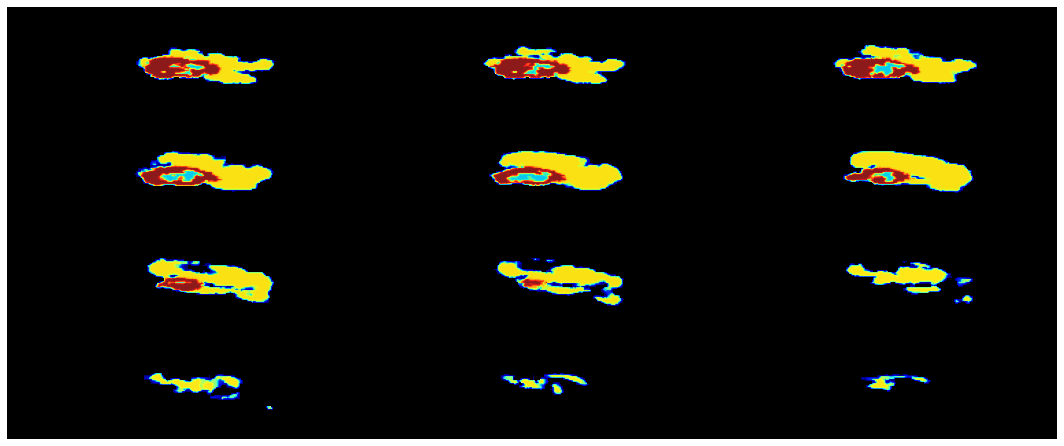

In [55]:
ants.plot(mask, mask_fixed_fwd_inv)

In [52]:
mask_fixed_fwd_inv

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 79)
	 Spacing    : (0.9375, 0.9375, 2.5)
	 Origin     : (-118.2, 118.0625, -117.1)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [ ]:

img = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/'+ sub +'/CT1_SEG.nii.gz')

img_orig = ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/'+ sub +'/CT1_SEG.nii.gz')
# img_orig = ants.reorient_image2(img_orig, orientation = 'RPI')

# img_to_sri = ants.registration(fixed=img_orig, moving=img, type_of_transform='Rigid')
img_fixed_res = ants.apply_transforms(img_orig, img, 
#                                       transformlist = img_to_sri['fwdtransforms'][0])
                                      transformlist = '/anvar/public_datasets/preproc_study/gbm/3a_atlas/'+ sub +'/T1C_to_SRI_inv.mat')
# img_fixed_res = ants.reorient_image2(img_fixed_res, orientation = 'RPI')

ants.plot(img_fixed_res, img_orig)